<a href="https://colab.research.google.com/github/yeeh-l/ch01Hw2020/blob/circleci-project-setup/ch02_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 >Ch02-Exercises            資工二_B0729066_葉冠志<br></h1>
2.5 Exercises
Solutions to these exercises are in chap02soln.ipynb.

* Exercise 1<BR>
If you use Jupyter, load chap02.ipynb and try out the examples. You can also view the notebook at http://tinyurl.com/thinkdsp02.

* Exercise 2<BR>
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

* Exercise 3<BR>
Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

* Exercise 4<BR>
If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean? Try this experiment:

Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform. Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component? Set spectrum.hs[0] = 100. What effect does this operation have on the waveform? Hint: Spectrum provides a method called make_wave that computes the Wave that corresponds to the Spectrum.

* Exercise 5<BR>
Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0. Test your function using a square, triangle, or sawtooth wave.

Compute the Spectrum and plot it. Modify the Spectrum using your function and plot it again. Use Spectrum.make_wave to make a Wave from the modified Spectrum, and listen to it. What effect does this operation have on the signal?

* Exercise 6<BR>
Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/f; the harmonics of the triangle wave drop off like 1/f2. Can you find a waveform that has even and odd harmonics that drop off like 1/f2? Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.

<h3>先抓 thinkdsp 

In [0]:
# get thinkdsp 

!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

In [0]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

<HR>
<H1>EX2

In [0]:
class SawtoothSignal(thinkdsp.Sinusoid):
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [0]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

<H3>這是他的波譜:

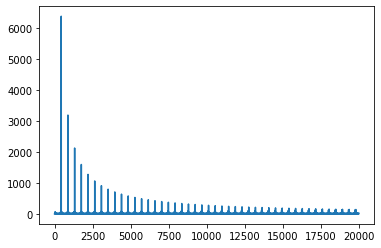

In [0]:
sawtooth.make_spectrum().plot();

<H4>與三角波相比，鋸齒波的下降速度不那麼快。

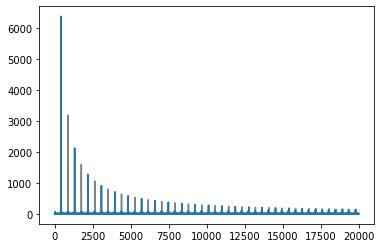

In [0]:
sawtooth.make_spectrum().plot(color='gray')
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()

<H4>三角波的諧波以$1/f^2$成比例下降

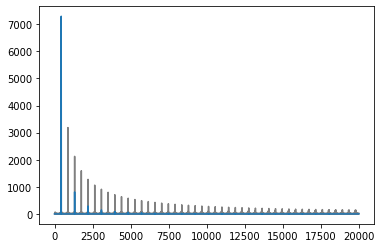

In [0]:
sawtooth.make_spectrum().plot(color='gray')
triangle = thinkdsp.TriangleSignal(amp=0.9).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()

<HR><H1>EX3


發出1100 Hz的方波，並產生以每秒10000幀的速度對其採樣的波形。如果繪製頻譜圖，則可以看到大多數諧波都是混疊的。當您聽波時，您能聽到混疊諧波嗎？

先做一個方波

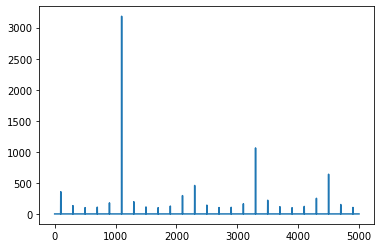

In [0]:
squareW = thinkdsp.SquareSignal(1100).make_wave(duration=0.5, framerate=10000)
squareW.make_spectrum().plot()

以10000為鏡面反射，5500->4500，7700->2300，基波和一次諧波在正確的位置。

<H4>聆聽波時，會以低音聽到這些混疊諧波<BR>音樂:

In [0]:
squareW.make_audio()


我最明顯聽到的聲音是300HZ。而這是300HZ的波，比較一下吧。

In [0]:
thinkdsp.SinSignal(300).make_wave(duration=0.5, framerate=10000).make_audio()

<HR><H1>EX4

If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean?<BR>
Try this experiment:

*  Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
*  Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component?
*  Set spectrum.hs[0] = 100. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

先造一個持續0.1秒的三角波

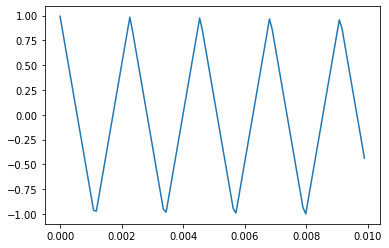

In [0]:
triangleA = thinkdsp.TriangleSignal().make_wave(duration=0.01)
triangleA.plot()

In [0]:
spectrum = triangleA.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

<H4>這波譜第一個元素是接近零的複數。

<H3>如果我們添加零頻率元素，則有增加波的:"垂直偏移"的效果。

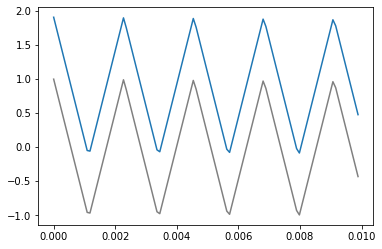

In [0]:
spectrum.hs[0] = 100
triangleA.plot(color='gray')
spectrum.make_wave().plot()


<H4><B><H2>作者:</B></H2>零頻率元素是信號中所有值的總和，這將在我們深入探討DFT的細節時看到。如果信號無偏，則零頻分量為0。在電信號的上下文中，零頻項稱為DC偏移；對於零頻項，稱為DC偏移。即，將直流偏移添加到交流信號。

<HR><H1>EX5</H1><BR>
Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

*  Compute the Spectrum and plot it.
*  Modify the Spectrum using your function and plot it again.
*  Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [0]:
def filter_spectrum(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

In [0]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav"
filename = '/content/92002__jcveliz__violin-origional.wav'
dWav = thinkdsp.read_wave(filename)

--2020-04-14 03:09:56--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441044 (431K) [audio/wav]
Saving to: ‘92002__jcveliz__violin-origional.wav’

92002__jcveliz__vio 100%[===================>] 430.71K  --.-KB/s    in 0.06s   

2020-04-14 03:09:57 (6.65 MB/s) - ‘92002__jcveliz__violin-origional.wav’ saved [441044/441044]



In [0]:
dWav.make_audio()

<H3>這裡我使用我上次作業用的音樂檔

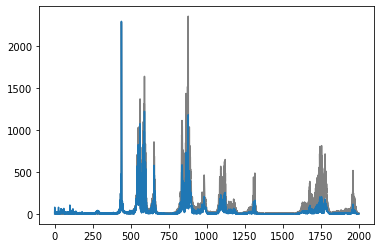

In [0]:
highC = 2000
spectrum = dWav.make_spectrum()
spectrum.plot(high=highC, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=highC)

上圖這是前後的樣子。按比例縮放後的圖片，使其以相同的比例可見

<H3>該濾波器會濾除諧波，因此其作用類似於低通濾波器。

<H3>聽起來是這樣的：

In [0]:
filtered = spectrum.make_wave()
filtered.make_audio()


<H3>現在三角波聽起來幾乎像是正弦波
<H4>(聽不太出來)

<HR><H1>EX6</H1>

The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.

角波和方波僅具有奇次諧波；鋸齒波同時具有偶次和奇次諧波。方波和鋸齒波的諧波按$ 1 / f $的比例下降；三角波的諧波像$ 1 / f ^ 2 $一樣下降。您能找到具有偶次和奇次諧波下降的波形，例如$ 1 / f ^ 2 $嗎？

提示：有兩種方法可以解決此問題：可以通過添加正弦波來構造所需的信號，或者可以從與所需信號相似的信號開始並進行修改。

<H3>先造出一個我們需要的鋸齒波，而這是他的聲音。

In [0]:
freq = 500
signal = thinkdsp.SawtoothSignal(freq=freq)
eWav = signal.make_wave(duration=0.5, framerate=20000)
eWav.make_audio() 

<H3>plot出來看

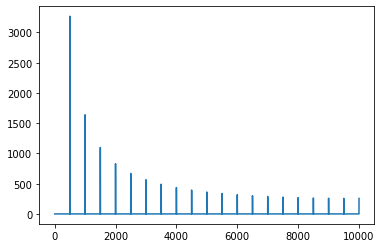

In [0]:
spectrum = eWav.make_spectrum()
spectrum.plot()

<H3>如果用在上一個練習中編寫的濾波器，我們可以使諧波下降像$ 1 / f ^ 2 $(藍色線條)。<BR>
如下圖:

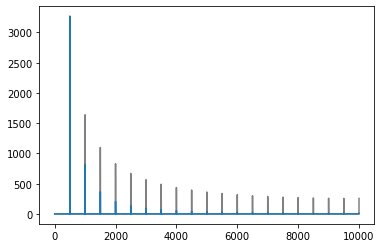

In [0]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

<H3>讓我們聽聽他的聲音:

In [0]:
wave = spectrum.make_wave()
wave.make_audio()

<H3>而這是他的波形:

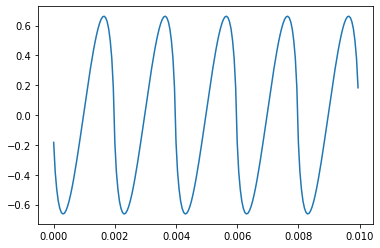

In [0]:
wave.segment(duration=0.01).plot()

<H1>END<BR><H3>Ch02-Exercises 資工二_B0729066_葉冠志
<HR>